<a href="https://colab.research.google.com/github/NicoMontoya/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Nico_montoya_DS_Unit_1_Sprint_Challenge_4_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

Load the data as a pandas data frame.

In [0]:
# basic imports
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
names = ['A1', 'A2','A3','A4','A5', 'A6', 'A7', 'A8', 'A9', 'A10',
         'A11', 'A12', 'A13', 'A14', 'A15', 'A16']

## loading csv data into DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/NicoMontoya/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/master/crx.data', names=names)

Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).

In [42]:
## checking to see if the shape makes sense according to data description
## it shoule have a total of 690 rows (301 approved cases + 383 rejected cases)
## and 16 columns.
df.shape

(690, 16)

UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na

In [43]:
## missing values are represented with '?' in the dataset
df['A1'].value_counts()

b    468
a    210
?     12
Name: A1, dtype: int64

In [0]:
## change all '?' into NaN values
df = df.replace('?', np.nan)

In [45]:
## check to see null values in dataframe after converting '?' to NaN values

df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

In [46]:
## check to see that the dataframe converted values to correct type
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

A1: b, a.
A2: continuous.
A3: continuous.
A4: u, y, l, t.
A5: g, p, gg.
A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
A7: v, h, bb, j, n, z, dd, ff, o.
A8: continuous.
A9: t, f.
A10: t, f.
A11: continuous.
A12: t, f.
A13: g, p, s.
A14: continuous.
A15: continuous.
A16: +,- (class attribute)

In [0]:
## changing types into appropriate form
df['A11'] = df['A11'].astype(float)
df['A14'] = df['A14'].astype(float)
df['A15'] = df['A15'].astype(float)
df['A2'] = df['A2'].astype(float)

In [48]:
## making sure that all the categories are correct types

df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

In [54]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
## creating two dataframes for the different groups
df_plus = df[df['A16'] == '+']
df_minus = df[df['A16'] == '-']

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


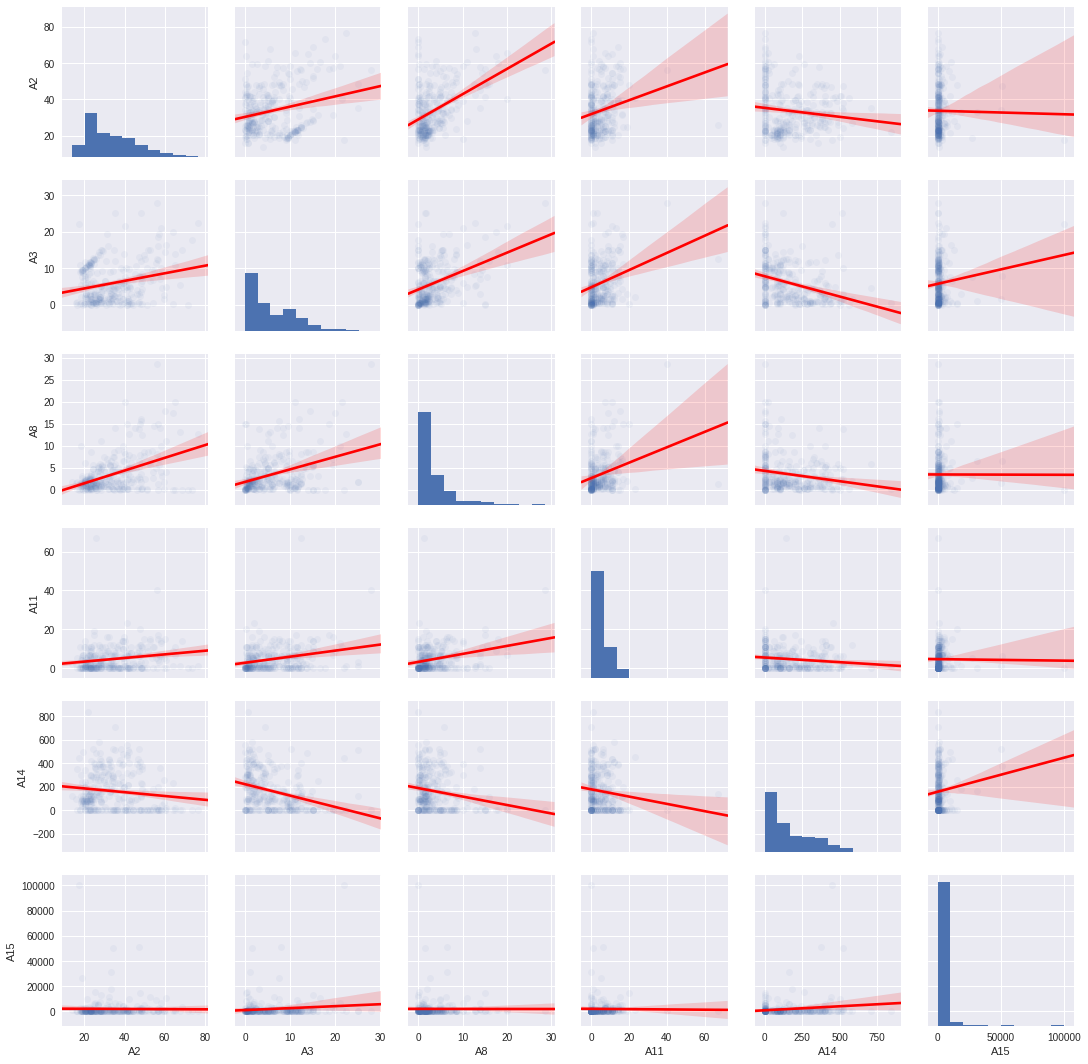

In [51]:
## quickly plotting data to see if there are any quick visual inferences I can make about the data
sns.pairplot(df_plus, kind='reg', plot_kws={'line_kws': {'color':'red'}, 'scatter_kws': {'alpha':0.05}})


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


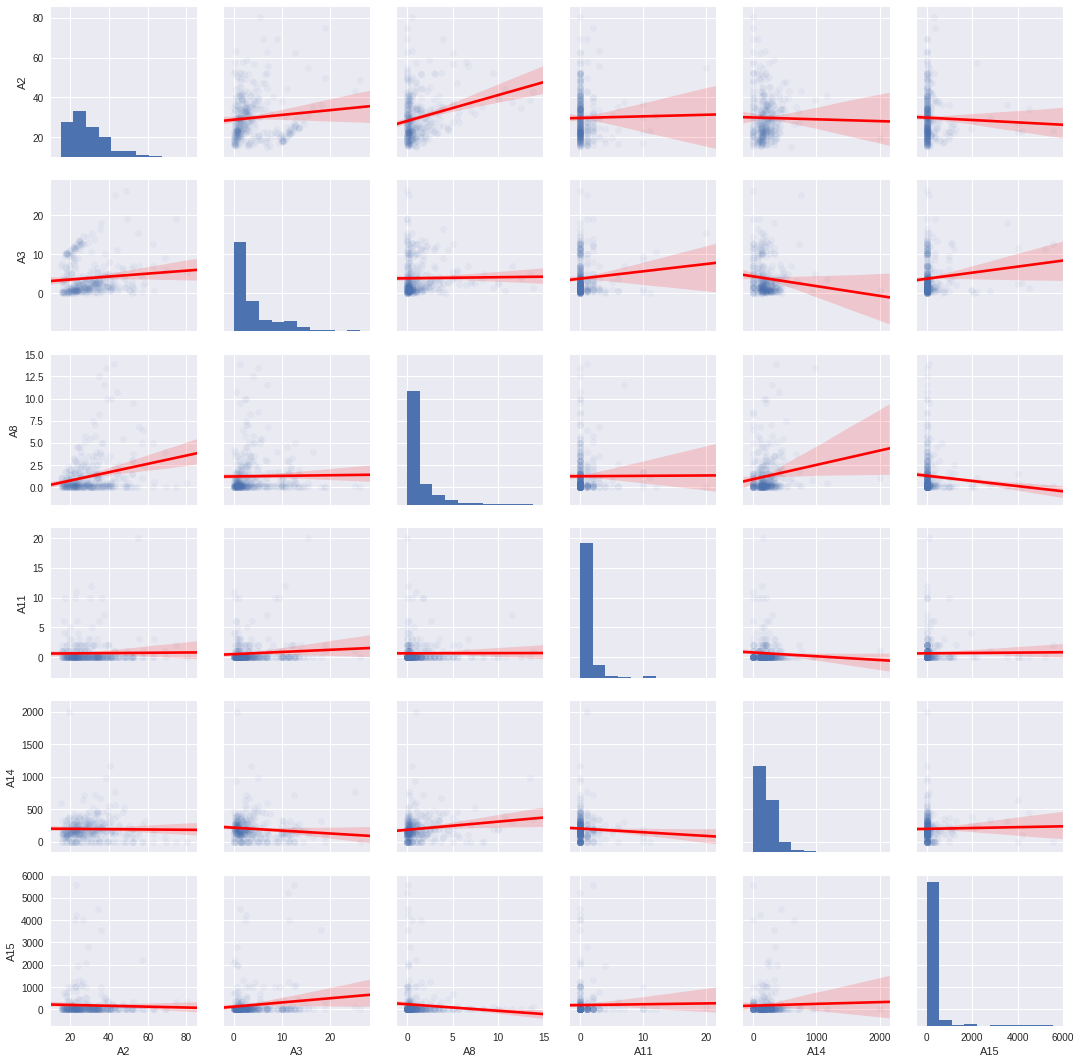

In [52]:
sns.pairplot(df_minus, kind='reg', plot_kws={'line_kws': {'color':'red'}, 'scatter_kws': {'alpha':0.05}})


In [119]:
##looking at means between groups

print(df_plus[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']].mean())
print(df_minus[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']].mean())

A2       33.720492
A3        5.904951
A8        3.427899
A11       4.605863
A14     164.421927
A15    2038.859935
dtype: float64
A2      29.808231
A3       3.839948
A8       1.257924
A11      0.631854
A14    199.699468
A15    198.605744
dtype: float64


In [61]:
## 2 samp ttest between means of 'A14' of '+' and '-' groups

stats.ttest_ind(df_plus['A14'], df_minus['A14'], nan_policy='omit')

Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)

In [63]:
## checking to see if ttest results make sense by looking at means
df_plus['A14'].mean(), df_minus['A14'].mean()

(164.421926910299, 199.6994680851064)

In [58]:
## 2 samp ttest between means of 'A11' of '+' and '-' groups

stats.ttest_ind(df_plus['A11'], df_minus['A11'], nan_policy='omit')

Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)

In [62]:
## checking to see if ttest results make sense by looking at means

df_plus['A11'].mean(), df_minus['A11'].mean()

(4.605863192182411, 0.6318537859007833)

## Continous variables conclusions
- Reject the null hypothesis that the means between '+' and '-' groups of 'A11' are equal and say
that they are different with the '+' mean being significantly greater than the '-' mean according to the t-statistic.

- Reject the null hypothesis that the means between '+' and '-' groups of 'A14' are equal and say
that they are different with the '-' mean being  greater than the '+' mean according to the t-statistic.  Yet not as much greater, compared to the difference between the means of 'A11'. Still statistically significant though

## Chi Square test analysis of categorical variables

In [112]:
## categorical data analysis. 'A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13'
## compare them and see if they are dependent or independent of 'A16'

A16vsA1 = pd.crosstab(df['A16'], df['A1'])
A16vsA1


A1,a,b
A16,,
+,98,206
-,112,262


In [113]:
## fail to reject null hypothesis.. that A16 and A1 are independent

chi_squared, p_value, dof, expected = stats.chi2_contingency(A16vsA1)


print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 0.31128326491619945
P-value: 0.5768937883001117
Degrees of Freedom: 1
Expected: 
 [[ 94.15929204 209.84070796]
 [115.84070796 258.15929204]]


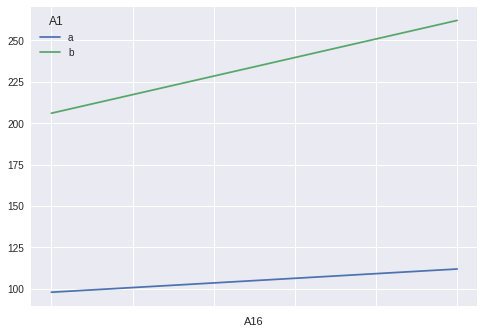

In [117]:
A16vsA1.plot()

In [114]:
A16vsA4 = pd.crosstab(df['A16'], df['A4'])
A16vsA4

A4,l,u,y
A16,,,
+,2,256,45
-,0,263,118


In [115]:
## reject null hypothesis that A16 and A4 are independent and say that they are
## correlated
chi_squared, p_value, dof, expected = stats.chi2_contingency(A16vsA4)


print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 26.234074966202144
P-value: 2.010680204180363e-06
Degrees of Freedom: 2
Expected: 
 [[  0.88596491 229.90789474  72.20614035]
 [  1.11403509 289.09210526  90.79385965]]


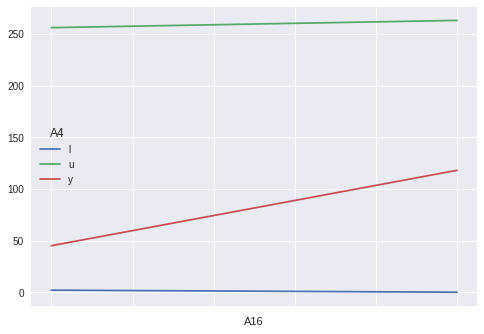

In [116]:
A16vsA4.plot()

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

## T-test conclusions
- Reject the null hypothesis that the means between '+' and '-' groups of 'A11' are equal and say
that they are different with the '+' mean being significantly greater than the '-' mean according to the t-statistic.

- Reject the null hypothesis that the means between '+' and '-' groups of 'A14' are equal and say
that they are different with the '-' mean being  greater than the '+' mean according to the t-statistic.  Yet the difference is not as great, compared to the difference between the means of 'A11'. Still statistically significant though

## Chi Square test conclusions
- After a Chi Square test on 'A16' vs 'A1', p-value was .576.. which means we fail to reject null hypothesis that the two are independent of each other.

- After a Chi Square test on 'A16' vs 'A4', p-value was 2.0e-06.  which is less than .05.  This means we can reject the null hypothesis and claim that the two are dependent of each other. 

##Most challenging part of this sprint challenge
- I did not get much practice with Chi Square testing.  So I had to reference documentation on the stats.chi2_contingency() function more than the other ones.  
- Everything else was pretty straight forward.  It is challenging to talk about the data and make inferences about it without knowing what the variables are.  I guess that is the point though.  To make inferences by purely looking at test results. Reducing any potential bias we could have going in.